<a href="https://colab.research.google.com/github/prakash4074/Python/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires p

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import drive
drive.mount("/content/drive")

path='/content/drive/My Drive/python/foodhub_order.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data


In [6]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
df['restaurant_name' = 'shakeshak']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [8]:
shakeshack_rows = df[df['restaurant_name'] == 'Shake Shack']
shakeshack_rows


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25
21,1478226,137565,Shake Shack,American,15.91,Weekend,Not given,25,20
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30
39,1476891,220693,Shake Shack,American,19.89,Weekend,Not given,27,19
64,1478077,82041,Shake Shack,American,33.03,Weekday,Not given,22,32
...,...,...,...,...,...,...,...,...,...
1881,1476700,127036,Shake Shack,American,12.23,Weekend,Not given,27,18
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [70]:
# Write your code here
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_new             1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB
(1898, 10)


Answer 1: There are 1898 rows and 9 columns

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

Answer 2] Order cost is a float, the food preparation time and delivery time are integers. The order id and customer id are also integers and the rest are objects

In [ ]:
# Write your code here


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

Answer 3] There are no missing values in the data

In [ ]:
# Write your code here

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Answer 4] The mininum time it takes to prepare the food is 20 minutes, maximum is 35 minutes and the average time is 27.37 minutes

#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
#null_count = df['rating'].isna().sum()
null_count = df[df['rating'] == 'Not given'].count()
print("Number of not rated values in the rating column" , null_count)
#df.head()

Number of not rated values in the rating column 0       9
1       9
6       9
10      9
14      9
       ..
1887    9
1891    9
1892    9
1895    9
1897    9
Length: 736, dtype: int64


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

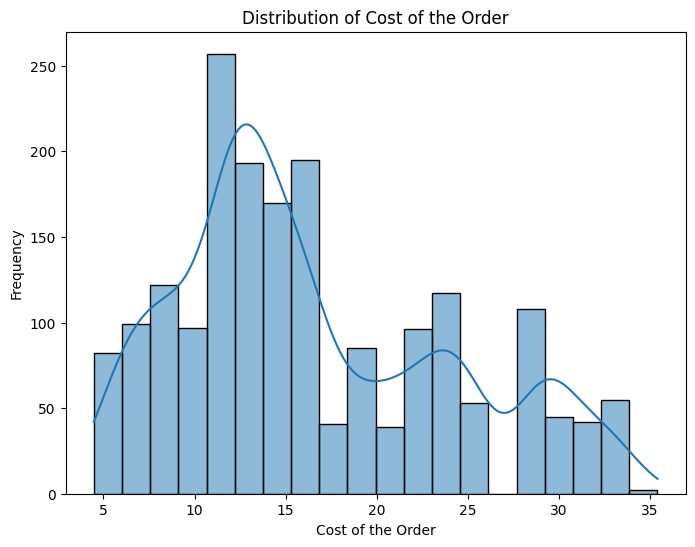

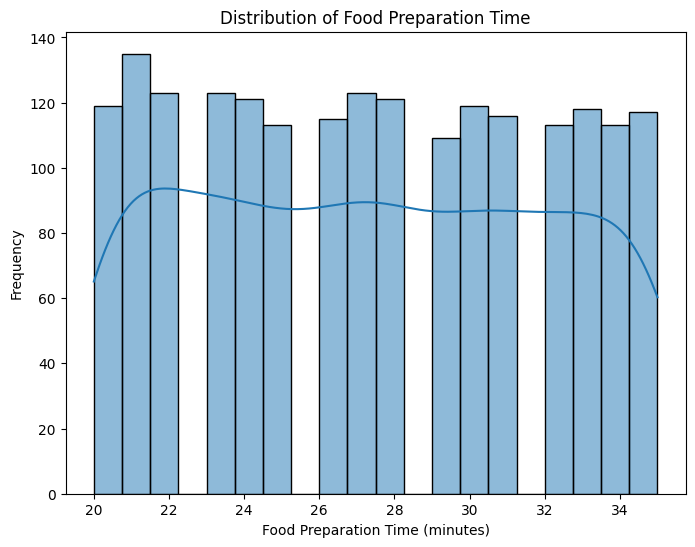

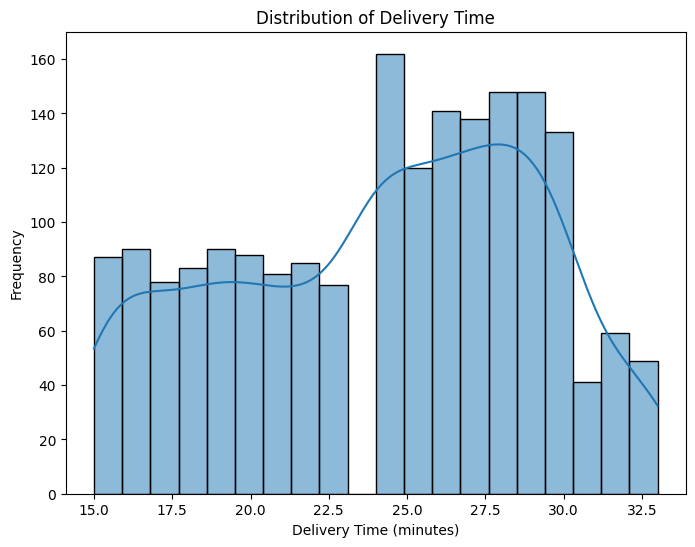

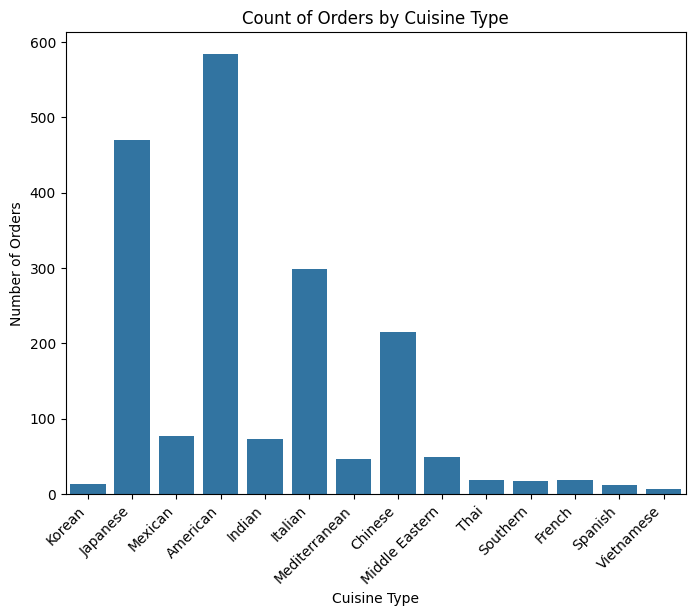

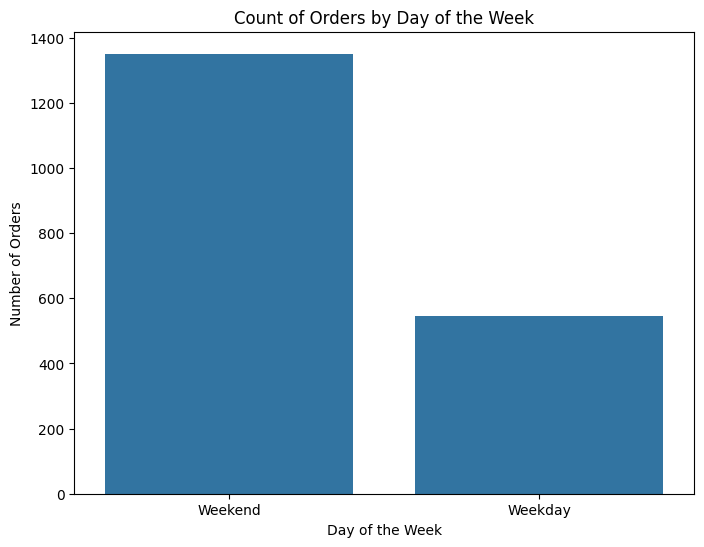

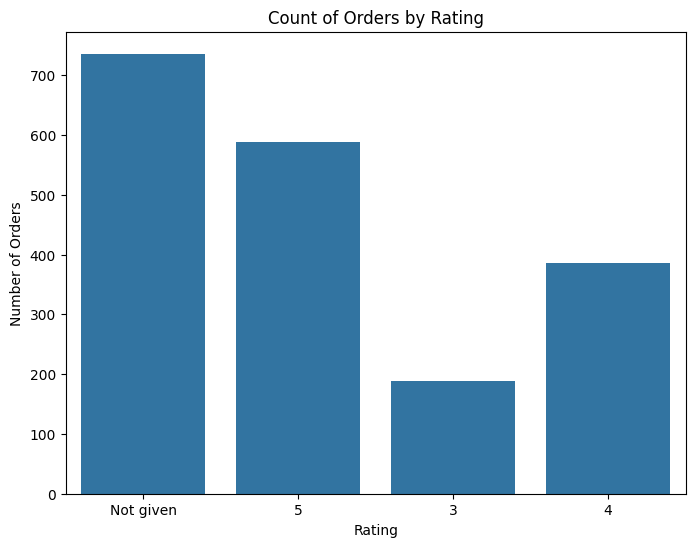

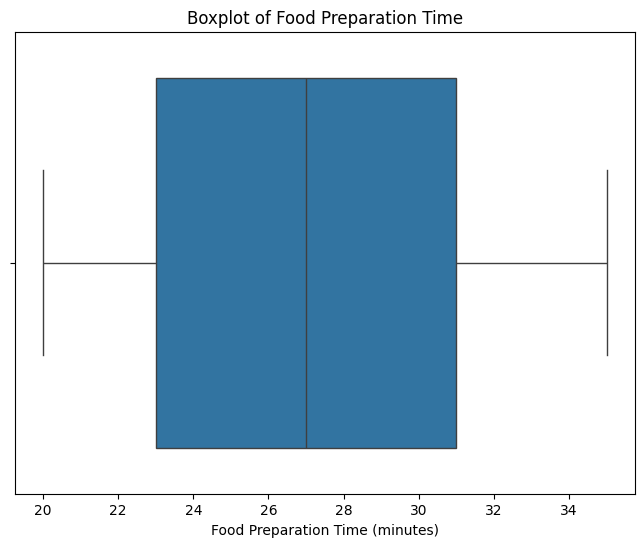

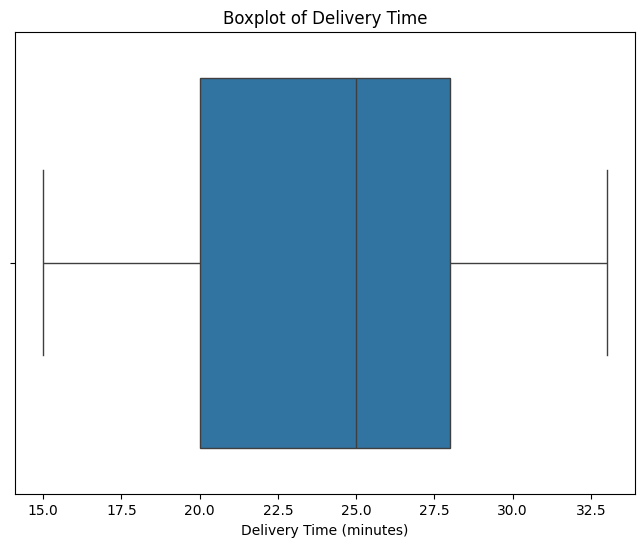

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['food_preparation_time'], bins=20, kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['delivery_time'], bins=20, kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='cuisine_type', data=df)
plt.title('Count of Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Count of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='food_preparation_time', data=df)
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='delivery_time', data=df)
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()




The American cuisine orders were more followd by Japanese. The orders were more on the week end.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Group by restaurant name and count the number of orders
top_restaurants = df.groupby('restaurant_name')['order_id'].count().nlargest(5)

print(top_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine_weekend = weekend_orders.groupby('cuisine_type')['order_id'].count().idxmax()

print(f"The most popular cuisine on weekends is: {most_popular_cuisine_weekend}")


The most popular cuisine on weekends is: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df['cost_of_the_order'] = pd.to_numeric(df['cost_of_the_order'], errors='coerce')
high_cost_orders = df[df['cost_of_the_order'] > 20]
percentage_high_cost_orders = (len(high_cost_orders) / len(df)) * 100
print(f"Percentage of orders costing more than $20: {percentage_high_cost_orders:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top_customers = df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers:")
print(top_customers)

Top 3 most frequent customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


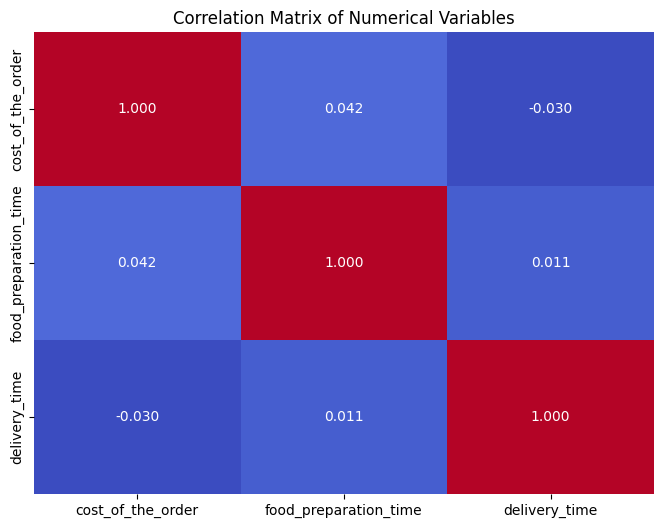

In [16]:
# Heatmaps between prep time, delivery and order cost.
import matplotlib.pyplot as plt
# Correlation Matrix
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False, fmt= '0.3f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

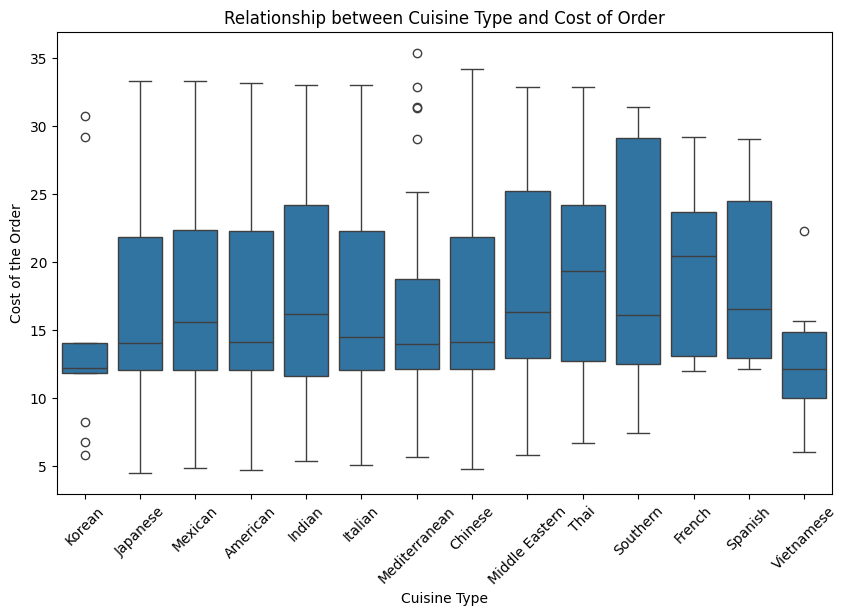

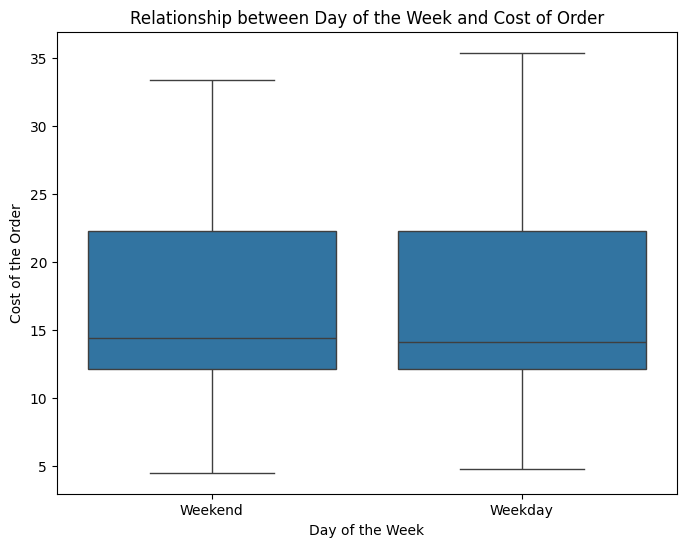

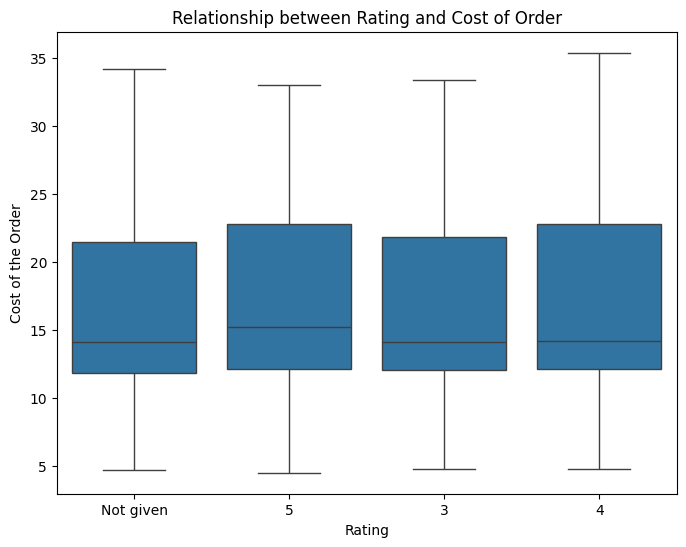

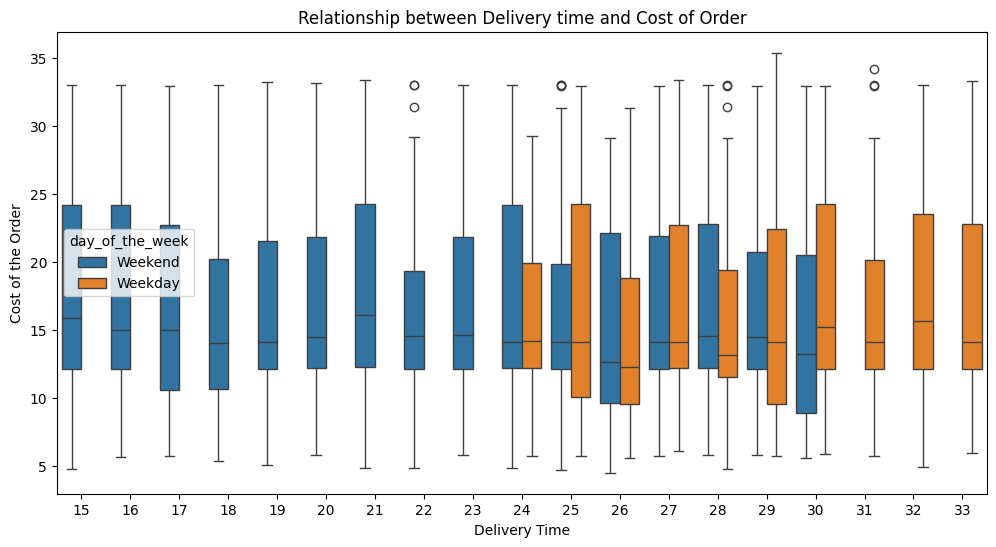

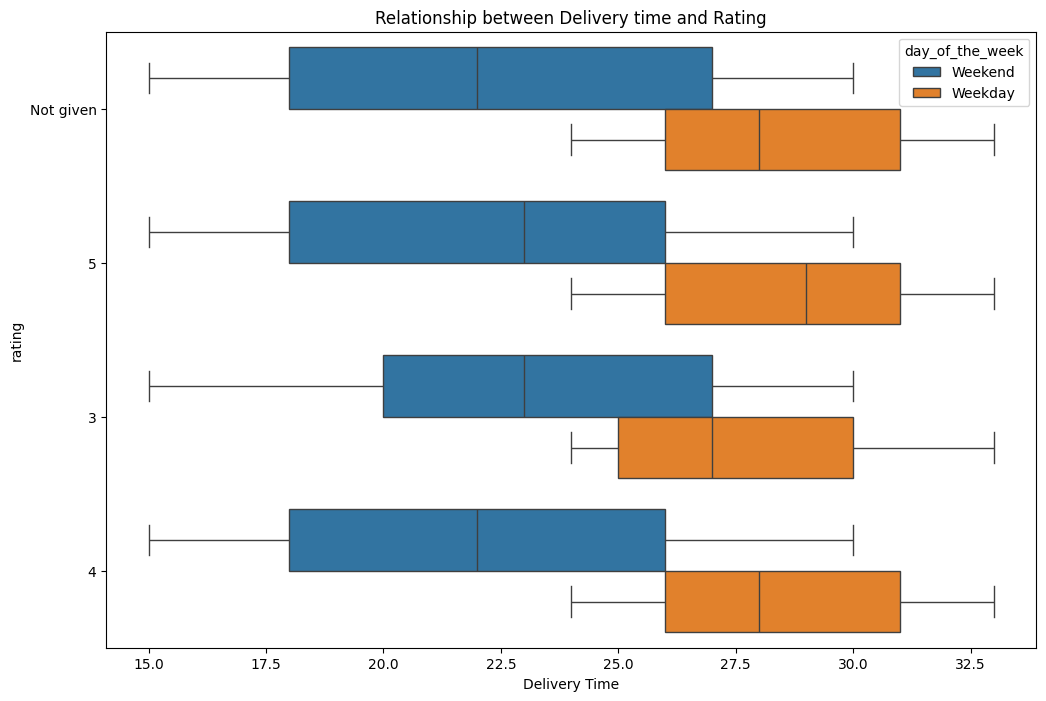

In [30]:
# Lets do the following boxplots to understand the cost of hte order vs the cusine, order time (week day/Week end), and Rating
#Relationship between Cuisine Type and Cost of Order
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Relationship between Cuisine Type and Cost of Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45, ha='center')
plt.show()

# Relationship between Day of the Week and Cost of Order
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Relationship between Day of the Week and Cost of Order')
plt.xlabel('Day of the Week')
plt.ylabel('Cost of the Order')
plt.show()

# Relationship between Rating and Cost of Order
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Relationship between Rating and Cost of Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

# Relationship between Rating and Cost of Order
plt.figure(figsize=(12, 6))
sns.boxplot(x='delivery_time', y='cost_of_the_order', data=df, hue='day_of_the_week')
plt.title('Relationship between Delivery time and Cost of Order')
plt.xlabel('Delivery Time')
plt.ylabel('Cost of the Order')
plt.show()

# Relationship between Rating and delivery time
plt.figure(figsize=(12, 8))
sns.boxplot(x='delivery_time', y='rating', data=df, hue='day_of_the_week')
plt.title('Relationship between Delivery time and Rating')
plt.xlabel('Delivery Time')
plt.ylabel('rating')
plt.show()

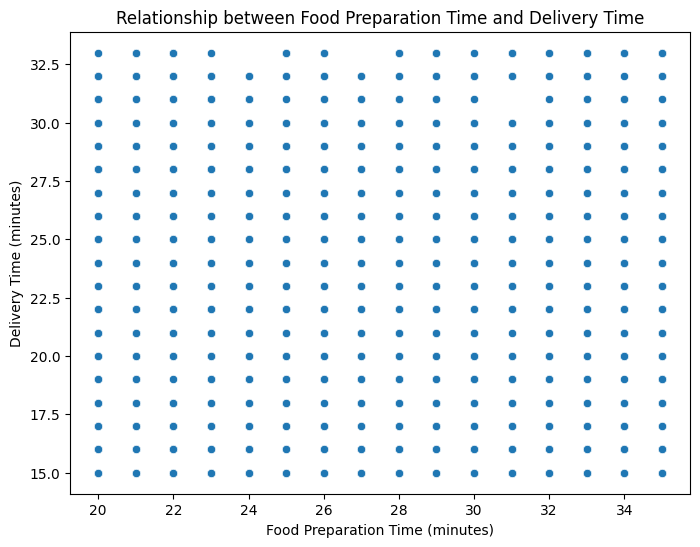

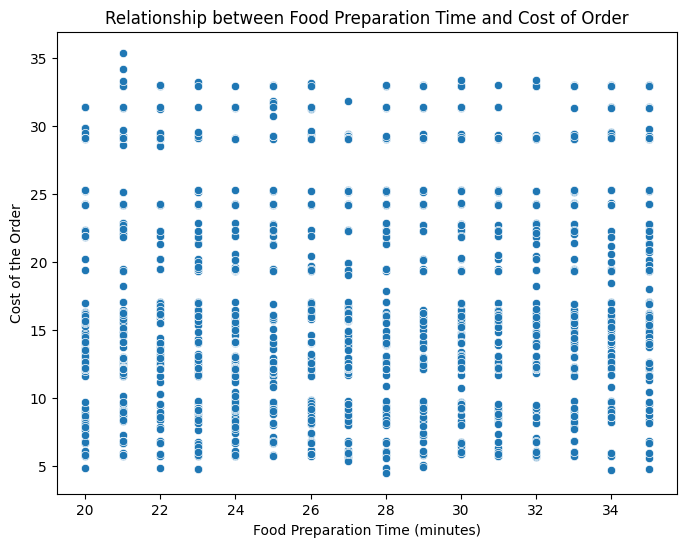

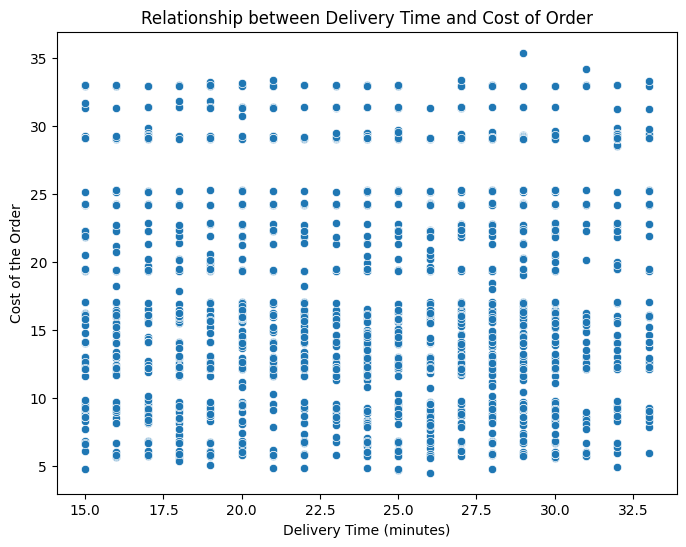

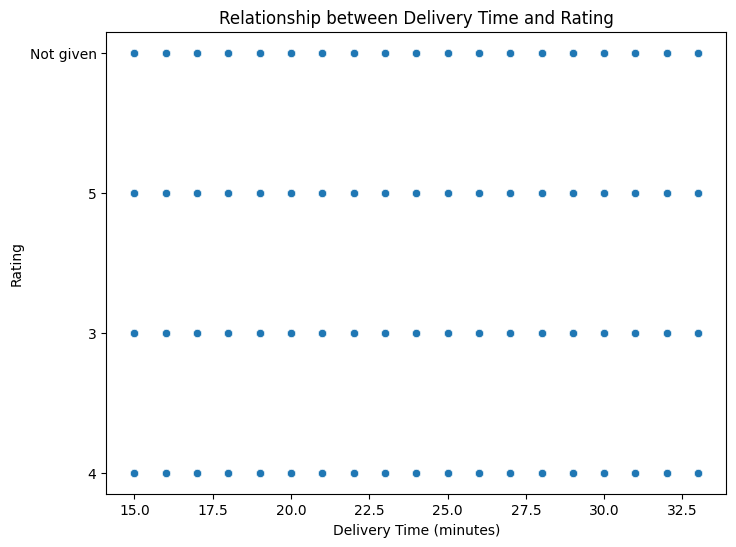

In [13]:
#time for scatter plots
# Relationship between Food Preparation Time and Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Relationship between Food Preparation Time and Cost of Order
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='cost_of_the_order', data=df)
plt.title('Relationship between Food Preparation Time and Cost of Order')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Cost of the Order')
plt.show()

# Relationship between Delivery Time and Cost of Order
plt.figure(figsize=(8, 6))
sns.scatterplot(x='delivery_time', y='cost_of_the_order', data=df)
plt.title('Relationship between Delivery Time and Cost of Order')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Cost of the Order')
plt.show()

# Relationship between Delivery Time and Cost of Order
plt.figure(figsize=(8, 6))
sns.scatterplot(x='delivery_time', y='rating', data=df)
plt.title('Relationship between Delivery Time and Rating')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Rating')
plt.show()

Answer 12 ]

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [18]:
# Convert to numeric, replacing 'Not Given' with NaN. Lets do that on a new column, that way we dont mess with the original data
df['rating_new'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter restaurants with rating count > 50 and average rating > 4

# Step 1 - Lets start doing a group by first
restaurant_ratings = df.groupby('restaurant_name')['rating_new'].agg(['count', 'mean'])
#print("Restaurant Ratings ", restaurant_ratings)
# Step 2 - Filter restaurants with rating count > 50 and average rating > 4
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
print("Promotional_restaurants \n", promotional_restaurants)


Promotional_restaurants 
                            count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_new             1162 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


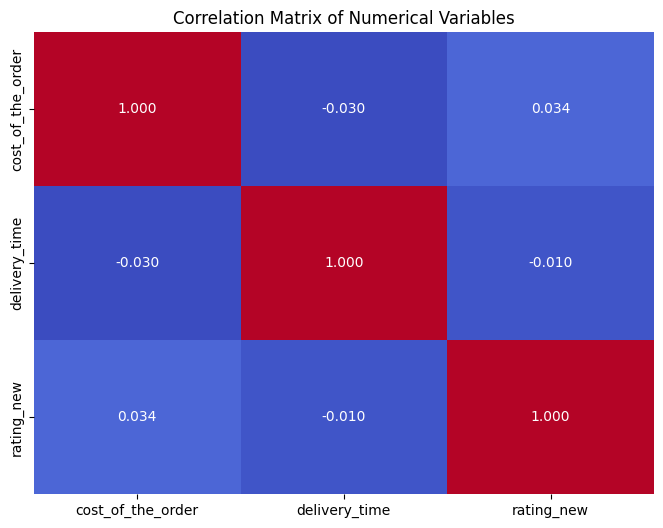

In [29]:

# Correlation Matrix
df.info()
correlation_matrix = df[['cost_of_the_order','delivery_time', 'rating_new']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False, fmt= '0.3f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [77]:
# Calculate the revenue for orders greater than $20
revenue_greater_than_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25
print("Total orders with revenue greater than $20 = " , revenue_greater_than_20)


# Calculate the revenue for orders greater than $5 and less than or equal to $20
revenue_greater_than_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15
print("Total orders with revenue more than $5 (but less than $20)= " , revenue_greater_than_5)

# Calculate the total net revenue
total_revenue = revenue_greater_than_20 + revenue_greater_than_5

print(f"The net revenue generated by the company across all orders is: ${total_revenue:.2f}")

Total orders with revenue greater than $20 =  3688.7275
Total orders with revenue more than $5 (but less than $20)=  2477.5755000000004
The net revenue generated by the company across all orders is: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [78]:
# Calculate the total delivery time (food preparation + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
percentage_orders_over_60_minutes = (len(df[df['total_delivery_time'] > 60]) / len(df)) * 100

print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage_orders_over_60_minutes:.2f}%")

Percentage of orders taking more than 60 minutes to deliver: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [79]:
# Group by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

mean_delivery_time_by_day


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [36]:
#how many ratings are 'Not Given' by day of the week?
not_given_ratings_by_day = df[df['rating'] == 'Not given'].groupby('day_of_the_week')['rating'].count()
print("The time of the week when ratings are not given is " , not_given_ratings_by_day)

df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=['Weekday', 'Weekend'])

# Group by day of the week and calculate the average delivery time
average_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print(average_delivery_time_by_day)

day_of_the_week
Weekday    207
Weekend    529
Name: rating, dtype: int64
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


<ipython-input-36-04f4fd1154bb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_given_ratings_by_day = df[df['rating'] == 'Not given'].groupby('day_of_the_week')['rating'].count()
<ipython-input-36-04f4fd1154bb>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()


### Conclusions:
*  The american cusine on the week ends is in much demand.

### Recommendations:

*  Better the delivery time on the week days. On the week ends the American and Japenese cuisine needs more ratings to reduce the 'Not Given' ratings. Maybe come up with a better strategy to capture ratings for these cuisine types.

Number of 'Not given' ratings by cuisine type:
 cuisine_type
American          216
Chinese            82
French              8
Indian             23
Italian           126
Japanese          197
Korean              4
Mediterranean      14
Mexican            29
Middle Eastern     15
Southern            4
Spanish             6
Thai               10
Vietnamese          2
Name: rating, dtype: int64


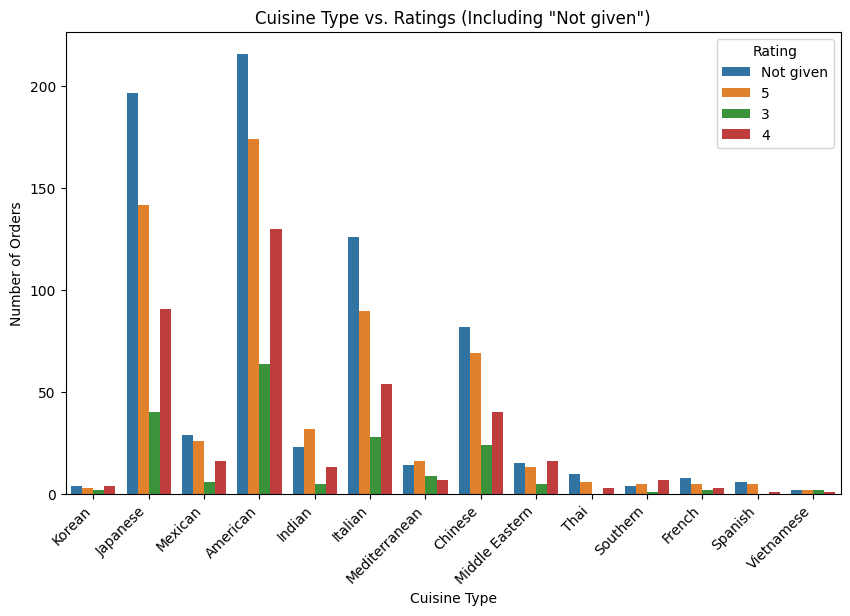

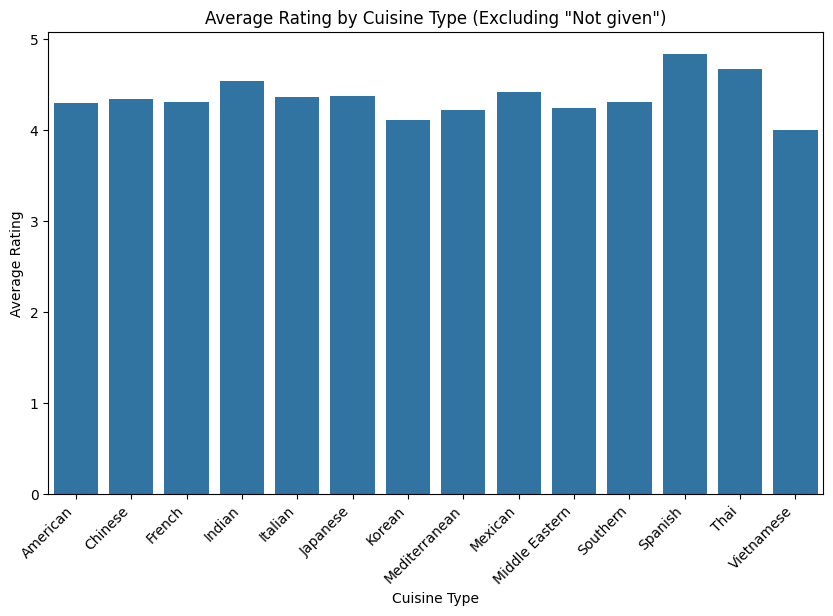

<ipython-input-38-0eaade185d26>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  not_given_by_day = df[df['rating'] == 'Not given'].groupby('day_of_the_week')['rating'].count()


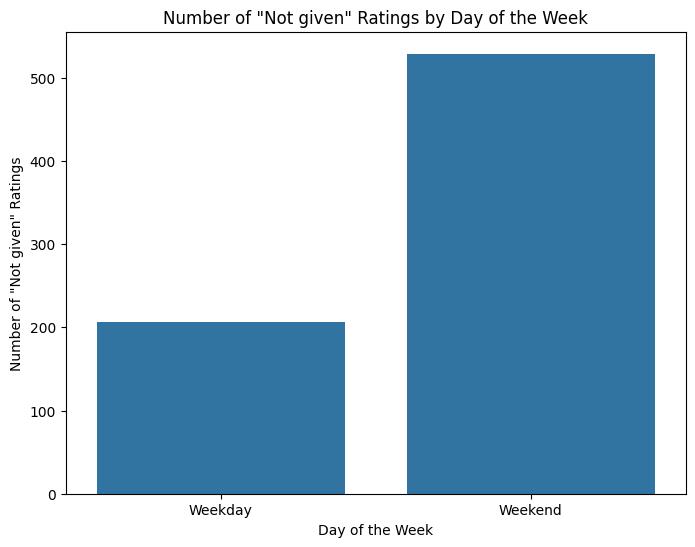

In [38]:
# Analyze cuisine type and 'Not given' ratings

# Group by cuisine type and calculate the number of 'Not given' ratings
not_given_by_cuisine = df[df['rating'] == 'Not given'].groupby('cuisine_type')['rating'].count()

# Print the results
print("Number of 'Not given' ratings by cuisine type:\n", not_given_by_cuisine)

# Analyze the relationship between cuisine type and 'Not given' ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='cuisine_type', hue='rating', data=df)
plt.title('Cuisine Type vs. Ratings (Including "Not given")')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rating')
plt.show()

# Analyze the relationship between cuisine type and average rating (excluding 'Not given')
average_rating_by_cuisine = df[df['rating'] != 'Not given'].groupby('cuisine_type')['rating_new'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_cuisine.index, y=average_rating_by_cuisine.values)
plt.title('Average Rating by Cuisine Type (Excluding "Not given")')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analyze the relationship between 'Not given' ratings and day of the week
not_given_by_day = df[df['rating'] == 'Not given'].groupby('day_of_the_week')['rating'].count()
plt.figure(figsize=(8, 6))
sns.barplot(x=not_given_by_day.index, y=not_given_by_day.values)
plt.title('Number of "Not given" Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of "Not given" Ratings')
plt.show()


---